In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from dataclasses import dataclass, asdict
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [82]:
def read_intline(fp):
    return [int(i) for i in fp.readline().strip(" \n").split()]

def read_file(path):
    problem = path.name[0]
    fp = path.open("r")
    D, I, S, V, F = read_intline(fp)
    
    streets = []
    name_to_end = {}
    for _ in range(S):
        B, E, street, L = fp.readline().strip(" \n").split()
        B, E, L = [int(i) for i in [B, E, L]]
        
        streets.append({"B": B, "E": E, "L": L, "name": street})
        name_to_end[street] = B
    streets_df = pd.DataFrame(streets)
    streets_df["problem"] = problem
    
    cars = []
    for i in range(V):
        P_and_streets = fp.readline().strip(" \n").split()
        P = int(P_and_streets[0])
        streets = P_and_streets[1:]
        for j in range(len(streets) - 1):
            cars.append({"start": streets[j], "end": streets[j + 1], "end_intersection": name_to_end[streets[j + 1]], "index": i})
    cars_df = pd.DataFrame(cars)
    cars_df["problem"] = problem
        
    return streets_df, cars_df

In [83]:
dfs = [read_file(file) for file in Path("data").glob("*.txt")]

In [84]:
streets_dfs = pd.concat([df for df, _ in dfs])
streets_dfs.sort_values(by="problem", inplace=True)
cars_dfs = pd.concat([df for _, df in dfs])
cars_dfs.sort_values(by="problem", inplace=True)

In [105]:
counts = cars_dfs.loc[cars_dfs.problem == "e", "end_intersection"].value_counts()

In [110]:
counts[499]

569

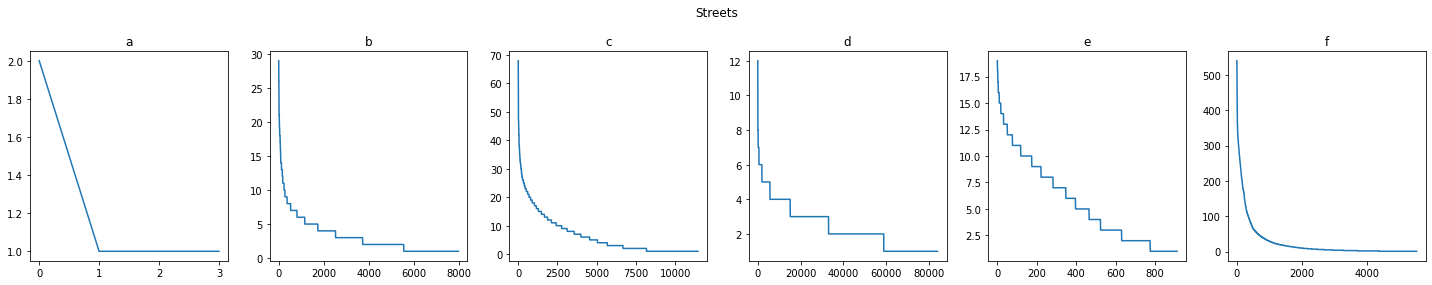

In [115]:
fig, axes = plt.subplots(1, 6, figsize=(20, 4))
for i, (problem, df) in enumerate(cars_dfs.groupby("problem")):
    counts = df["end"].value_counts()
    axes[i].plot(np.array(counts))
    axes[i].set_title(problem)

plt.suptitle("Streets")
plt.tight_layout()
plt.show()

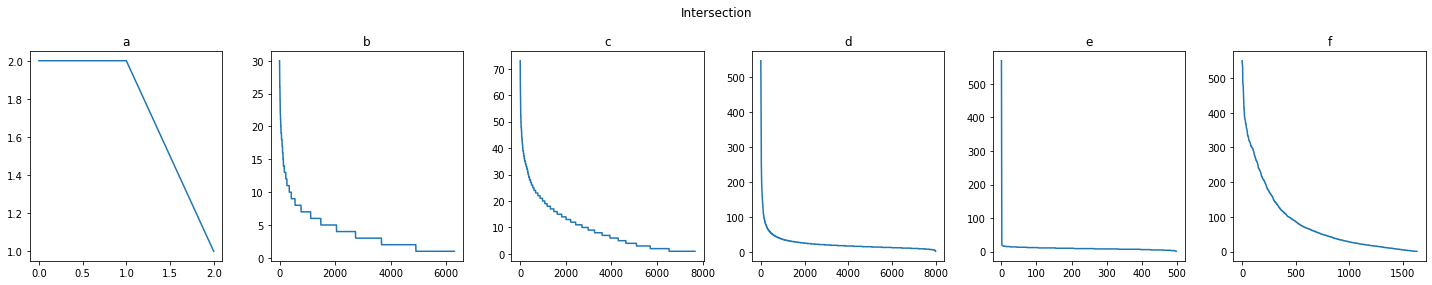

In [113]:
fig, axes = plt.subplots(1, 6, figsize=(20, 4))
for i, (problem, df) in enumerate(cars_dfs.groupby("problem")):
    counts = df["end_intersection"].value_counts()
    axes[i].plot(np.array(counts))
    axes[i].set_title(problem)

plt.suptitle("Intersection")
plt.tight_layout()
plt.show()

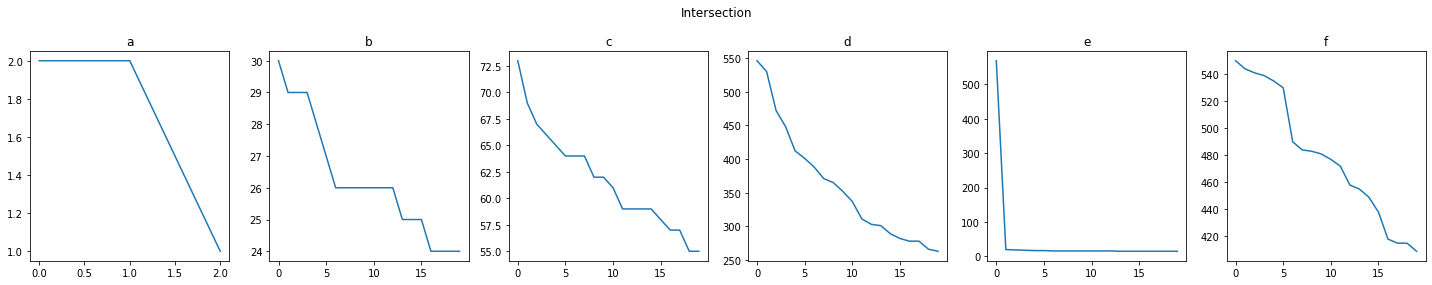

In [97]:
fig, axes = plt.subplots(1, 6, figsize=(20, 4))
for i, (problem, df) in enumerate(cars_dfs.groupby("problem")):
    counts = df["end_intersection"].value_counts()
    axes[i].plot(np.array(counts)[:20])
    axes[i].set_title(problem)

plt.suptitle("Intersection")
plt.tight_layout()
plt.show()

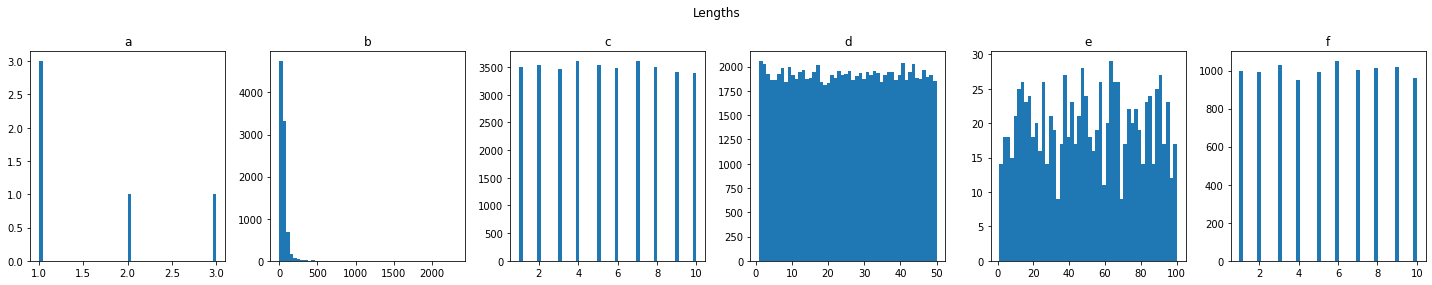

In [112]:
fig, axes = plt.subplots(1, 6, figsize=(20, 4))
for i, (problem, df) in enumerate(streets_dfs.groupby("problem")):
    axes[i].hist(df.L, bins=50)
    axes[i].set_title(problem)

plt.suptitle("Lengths")
plt.tight_layout()
plt.show()